# LEAD SCORING CASE STUDY

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Importing dataset

data=pd.read_csv("leads1.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# Shape of the Dataset - Rows and Columns
data.shape

#- 9240 rows and 37 columns

(9240, 37)

In [4]:
#Information on the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Summary Stats of the data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


Since Prospect ID is Customer ID, it should be unique.
Below, we are checking if there are any Duplicate IDs in the Prospect ID

In [6]:
# Checking if we have duplicates under Prospect ID.

duplicate_prospect_ID = data.duplicated(subset = 'Prospect ID')

print (sum(duplicate_prospect_ID) == 0)   

True


** There are no Duplicates under the Prospect ID**

In [7]:
# Checking if we have duplicates under Lead Number.

duplicate_LeadNo = data.duplicated(subset = 'Lead Number')
print(sum(duplicate_LeadNo) == 0)

True


** There are no Duplicates under the Lead Number**

From the above analysis, we can understand that Prospect ID and Lead Number are variables that define the same customer who was contacted.
We can drop both the variables as they do not provide us any further insghts and hence it may not be appropriate to keep both the variables

## EDA on the Dataset

## Data Cleaning & Treatment:

In [8]:
#Removing Lead Number and Prospect ID from the data

data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)


In [9]:
# Checking data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [10]:
# From the problem statement, it is clear to understand that Many of the categorical variables have a level called 'Select'
#which needs to be handled because it is as good as a null value. hence 'Select' can be converted to Null.

data = data.replace('Select', np.nan)

In [11]:
# Checking data again after inserting Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [12]:
#Checking for total null values in the dataset

data.isnull().sum().sum()

54419

There are 54419 Null values present in the data

In [13]:
#Checking for null values present in the each column
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
# Finding the ratio of Null values present in each column for further analysis

Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [15]:
#Here we are taking a call to remove the columns that have more than 45% of missing values as they do not add on to the analysis


columns = data.columns

for i in columns:
    if (100 * (data[i].isnull().sum() / len(data.index))) >= 45:
        data.drop(i, axis=1, inplace=True)


In [16]:
# Checking for null ratio after removing the columns which has more than 45% of the Null Values
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

## EDA on Categorical variables:

In [17]:
# Checking data again after inserting Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [18]:
#Value counts of Country column

data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

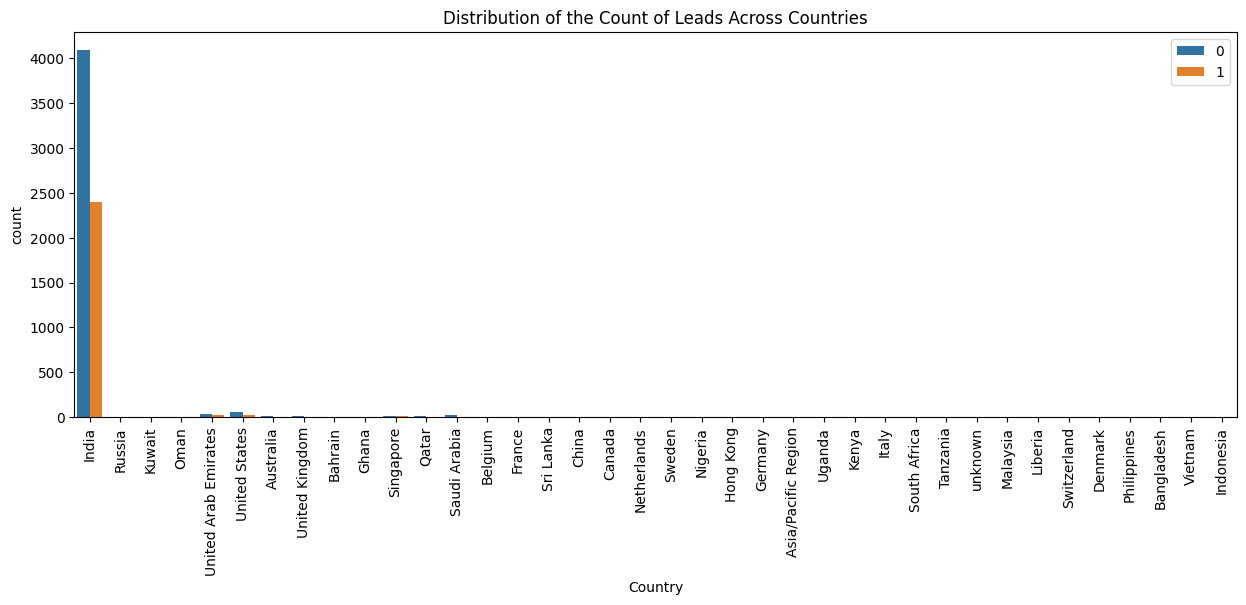

In [19]:
#Visualising the Country column

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(), rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of Leads Across Countries")
plt.legend(loc='upper right')  # 'upper right' is more descriptive than loc=1
plt.show()


In [20]:
# Checking the most frequent Country in th Country Column 

data['Country'].mode()

0    India
Name: Country, dtype: object

In [21]:
# From the above, we can understand that India is the most occuring country in the Country Column.
# Hence we can replace null values with India

data['Country'] = data['Country'].replace(np.nan,'India')

In [22]:
# Checking the value count after imputing the null values
data['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

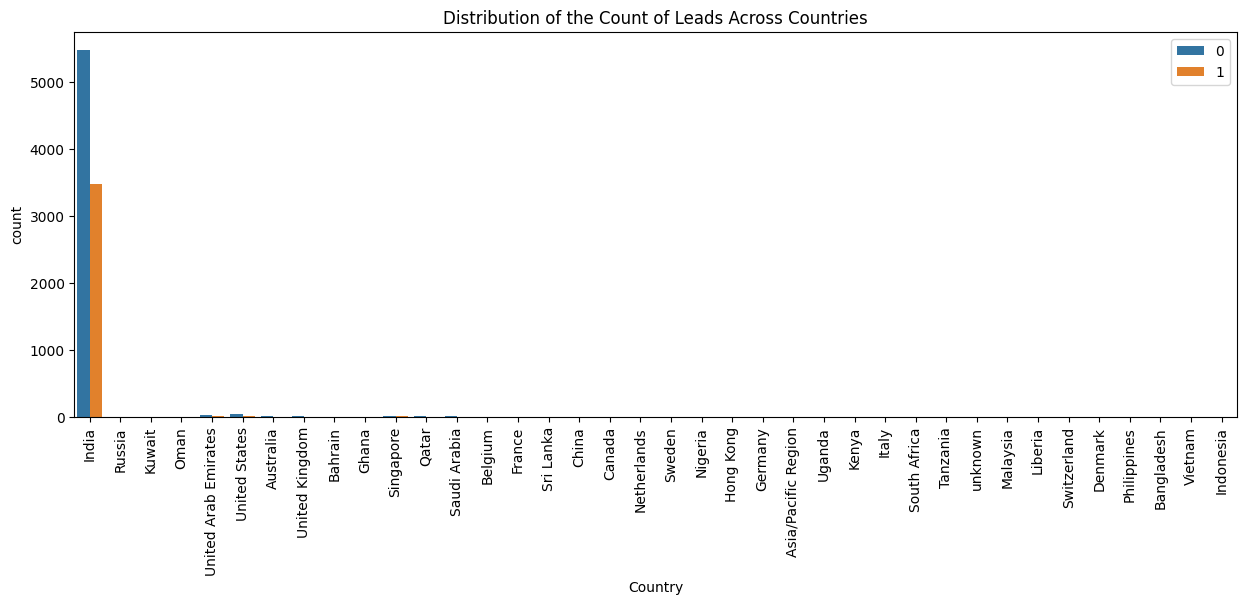

In [23]:
#Visualising the Country column after replacing NaN values

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(), rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of Leads Across Countries")
plt.legend(loc='upper right')  # Using 'upper right' for clarity
plt.show()



Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [24]:
# Removing Country column frmom data
data.drop('Country',axis=1,inplace=True)

In [25]:
# Checking if Country in present in the data column

"Country" in data.columns

False

In [26]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [27]:
# Checking the City Column

data['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [28]:
# Checking for the most frequest value in City 
data['City'].mode()

0    Mumbai
Name: City, dtype: object

In [29]:
# Mumbai has been tagged as the most frequently occuring value. hence we can impute Null values with Mumbai

In [30]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

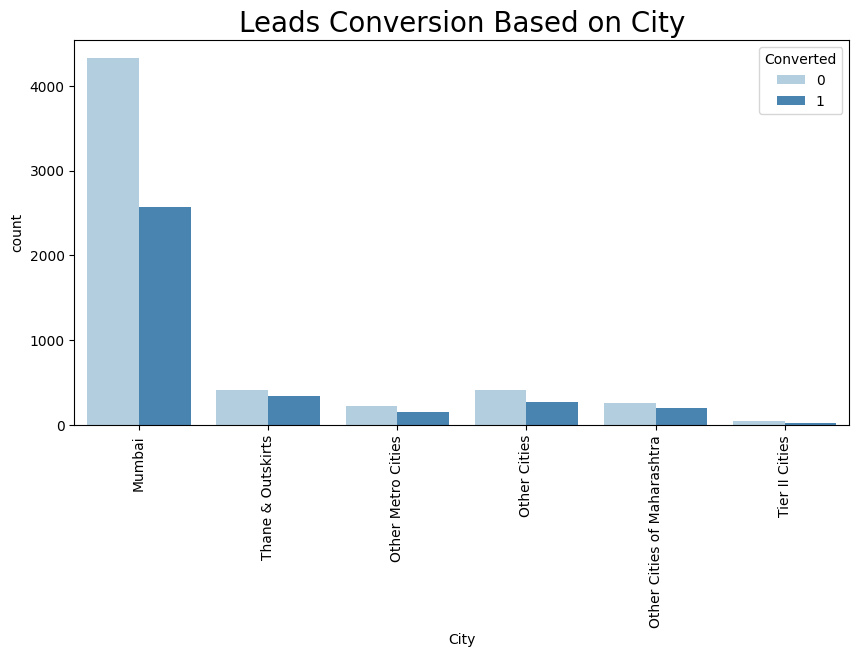

In [31]:
#Visuaising the City columnn after amending Null values

plt.figure(figsize=(10, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='City', hue='Converted', data=data, palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=10)  # Adjust fontsize for clarity

# Formatting the figure
plt.title("Leads Conversion Based on City", fontsize=20)
plt.show()


**Similar to the previous analysis we can confirm that Mumbai is the most occuring city**

In [32]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [33]:
#checking Specialization column

data['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [34]:
# There seems to be a scenario in this variable.
#Some customer may not have mentioned specialization as it was not in the list or there aren't any 
# Hence we can impute the NA's as 'Not Specified'

data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

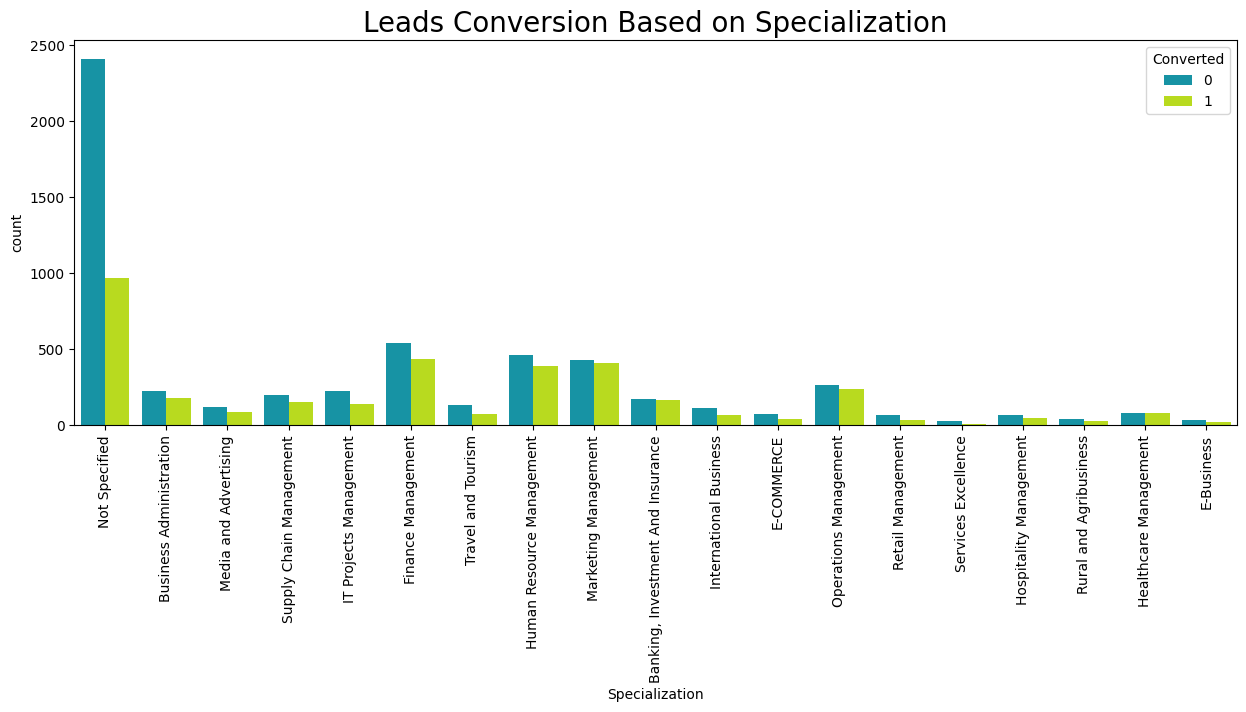

In [35]:
#plotting spread of Specialization columnn 

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Specialization', hue='Converted', data=data, palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=10)

# Formatting the plot
plt.title("Leads Conversion Based on Specialization", fontsize=20)
plt.show()


Insights - **Management** has the  higher number of leads converted. This is importannt and should not be removed.

In [36]:
data['Specialization'].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [37]:
#Since Management is an import metric insde Specialisation, we could combine the entire Managements under one umbrella
# We will call this combo as Management_Specializations

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

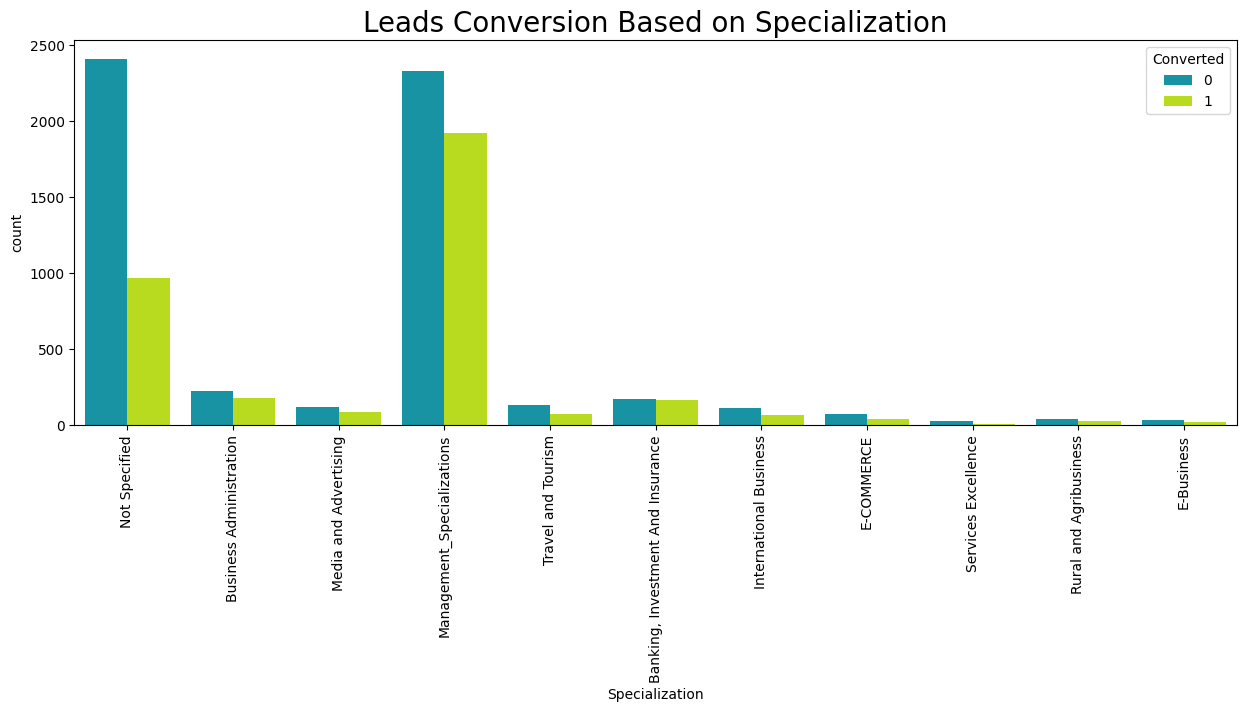

In [38]:
#plotting Specialization column after consolidating the Management Sepcializations

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Specialization', hue='Converted', data=data, palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=10)

# Formatting the plot
plt.title("Leads Conversion Based on Specialization", fontsize=20)
plt.show()


In [39]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [40]:
#Checking "What is your current occupation" as it has the most Null values in the above info
#Looking for value counts inside the Occupation

data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Since we have most of the Occupation listed under the Occupation column and we can still find NA values, we can impute NA's with "Unemployed"

In [41]:
#Replacing Null values with "Unemployed"

data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [42]:
#Value counts after imputation
data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

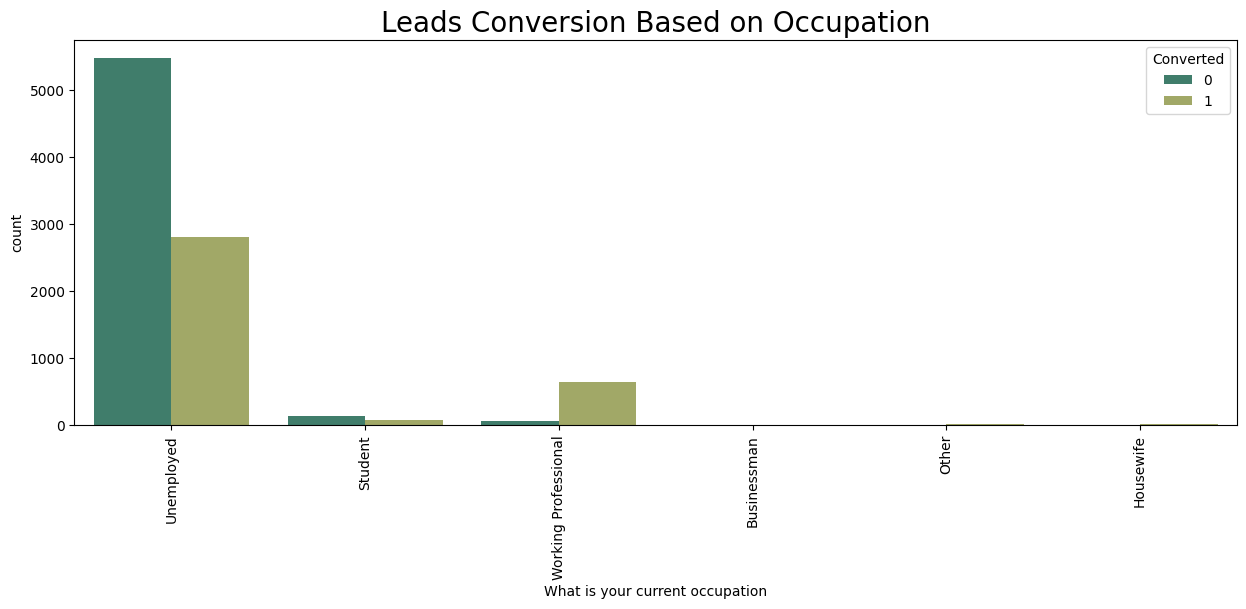

In [43]:
#Visualizing the Employment Variable

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='What is your current occupation', hue='Converted', data=data, palette='gist_earth')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=10)

# Formatting the plot
plt.title("Leads Conversion Based on Occupation", fontsize=20)
plt.show()


In [44]:
#Ratio of categories after imputation
data['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

What is your current occupation
Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: proportion, dtype: float64

From the above two analysis, we can understand :
- Chances are high for Working Professionals going for the course.
- Unemployed leads are the most in the leads
- Housewives, Businessman, Student and Other categories may not be converted to join the course

In [45]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [46]:
#checking the variable "What matters most to you in choosing a course"

data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [47]:
#replacing Null values with Mode "Better Career Prospects"

data ['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

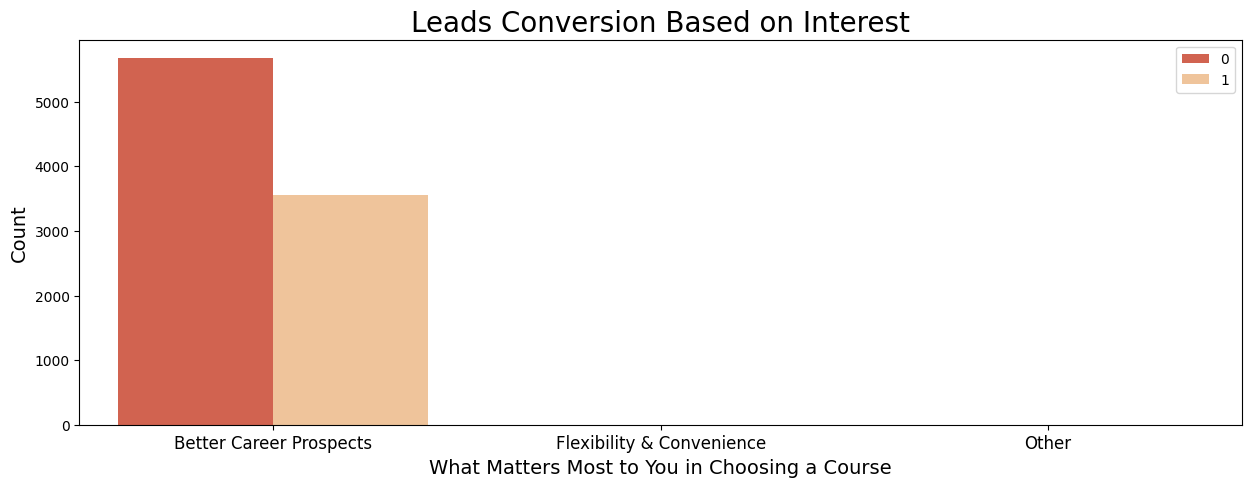

In [48]:
#visualizing Variable "What matters most to you in choosing a course

#Setting the frame
# Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=data, palette='OrRd_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=0, fontsize=12)

# Formatting the plot
plt.title("Leads Conversion Based on Interest", fontsize=20)
plt.xlabel("What Matters Most to You in Choosing a Course", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(loc='upper right')  # 'upper right' is more descriptive
plt.show()


In [49]:
#checking Ratio of variable 
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects     99.97
Flexibility & Convenience    0.02
Other                        0.01
Name: proportion, dtype: float64

Since "Better Career Prospects" influences the column drastically, we can remove that column as it will create bias

In [50]:
data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [51]:
#Rechecking data after removing the variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [52]:
#checking value counts of  variable 'Tag'
data['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"

In [53]:
#Changing Nan values in Tag with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

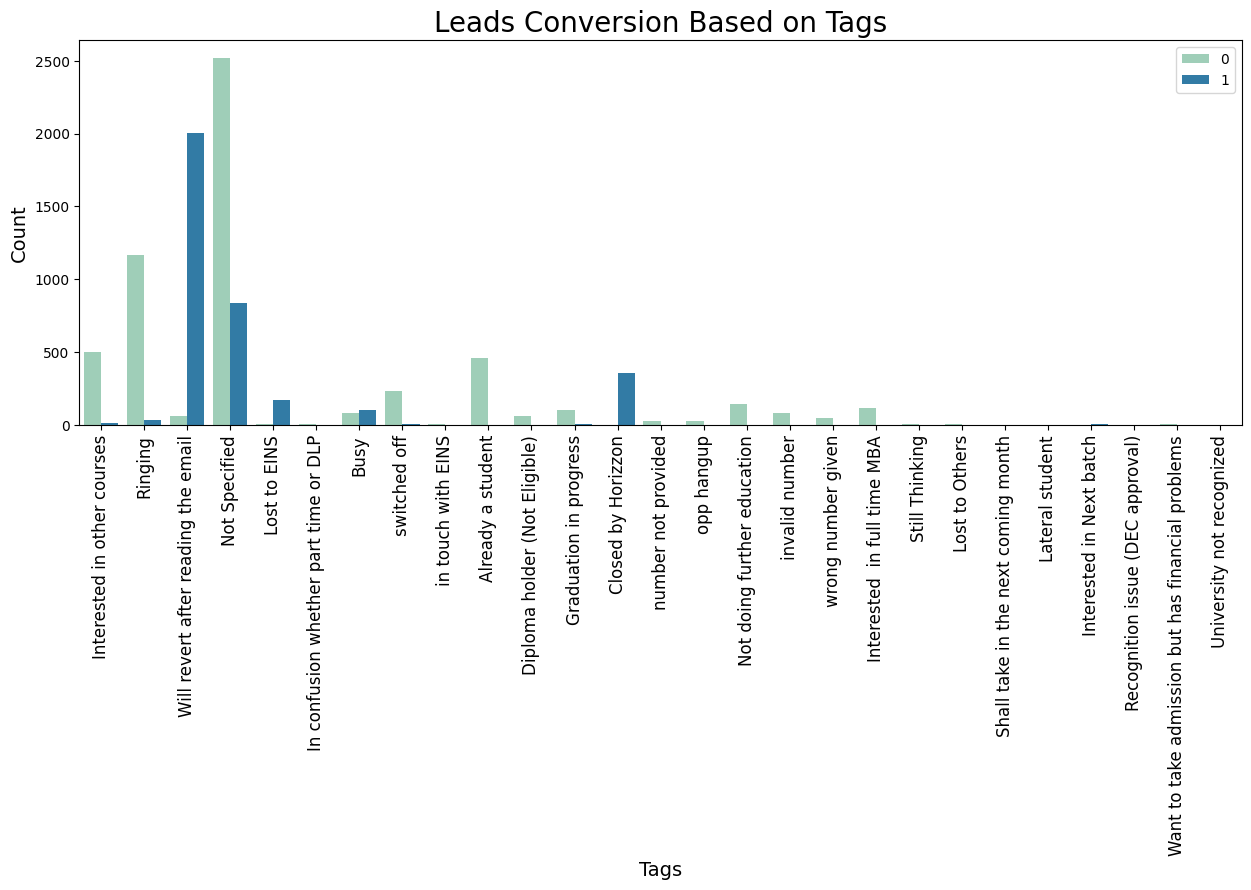

In [54]:
#Countplot on Tag variable

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Tags', hue='Converted', data=data, palette='YlGnBu')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=12)

# Formatting the plot
plt.title("Leads Conversion Based on Tags", fontsize=20)
plt.xlabel("Tags", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(loc='upper right')  # Use 'upper right' for clarity
plt.show()


In [55]:
#Since some tags have very minimal values, we can replace them as "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [56]:
# Rechecking the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [57]:
# Checking the null values in the data
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [58]:
#checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Since Lead source has very less null values, we can replace Null as Others

In [59]:
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')

In [60]:
#Also we can combining low frequency values present in the Lead Source

data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

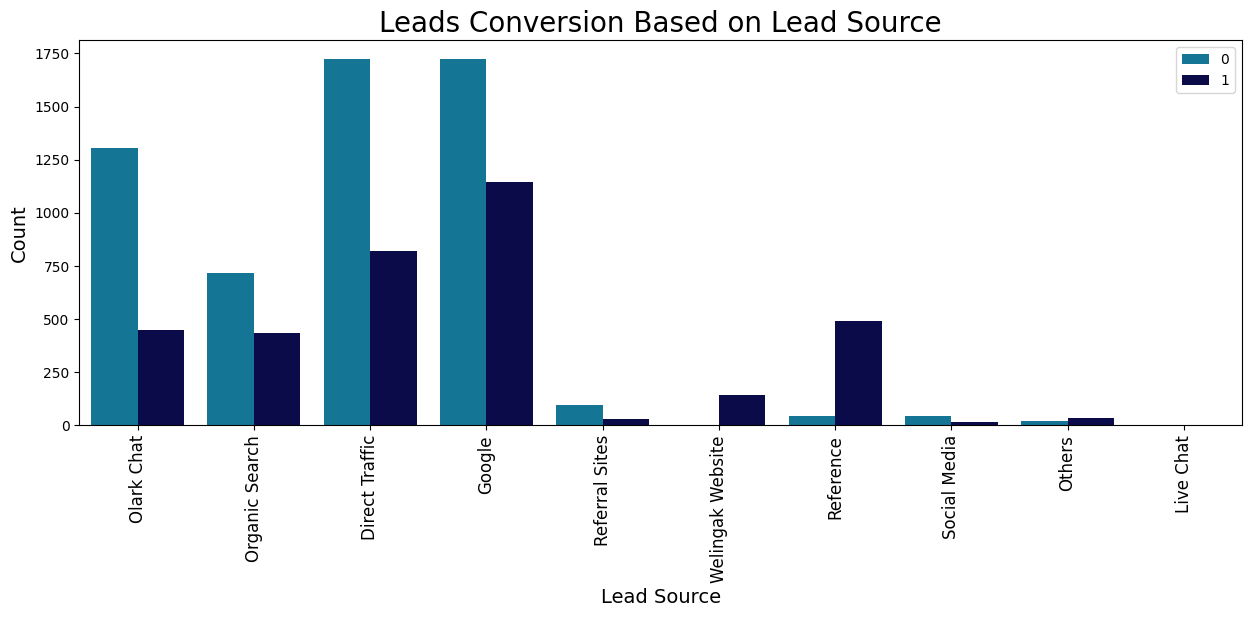

In [61]:
#Countplot on Lead Source variable

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Lead Source', hue='Converted', data=data, palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90, fontsize=12)

# Formatting the plot
plt.title("Leads Conversion Based on Lead Source", fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(loc='upper right')  # 'upper right' is more descriptive
plt.show()


### Analysis :
    -Most of the leads generated are through Google and Direct traffic and the least through Live Chat
    -Welingak website ahs the most conversion rate
    -Lead conversion can be improved by maxising leads from Reference and welingak website
    -Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion

In [62]:
# Checking Last Activity variable

data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [63]:
# Checking on the ratio of categories

data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Last Activity
Email Opened                   37.20
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
NaN                             1.11
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: proportion, dtype: float64

In [64]:
# Converting Null values to "others"
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

In [65]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [66]:
# Checking the values of the Last Activity Variable

data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [67]:
# Recheck the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [68]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                       0.00
Update me on Supply Chain Content       

**Since we have the total NA's less than 2%, we can remove the rows as it will not have effect on the model**

In [69]:
#Droping NA values
data = data.dropna()

In [70]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                       0.00
Update me on Supply Chain Content       

In [71]:
#Checking the Lead Origin variable

data['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

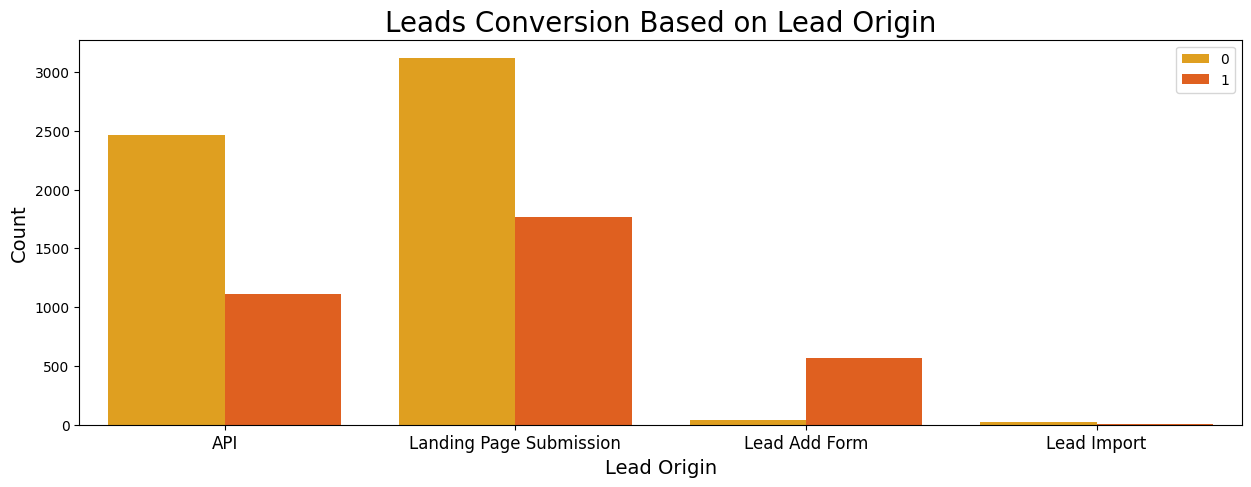

In [72]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Lead Origin', hue='Converted', data=data, palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=0, fontsize=12)

# Formatting the plot
plt.title("Leads Conversion Based on Lead Origin", fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(loc='upper right')  # 'upper right' is more descriptive
plt.show()


#### Analysis
- API and Landing Page Submission bring more number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- If Lead add form could get more leads, then the rate of conversion can be very high and for overall growth

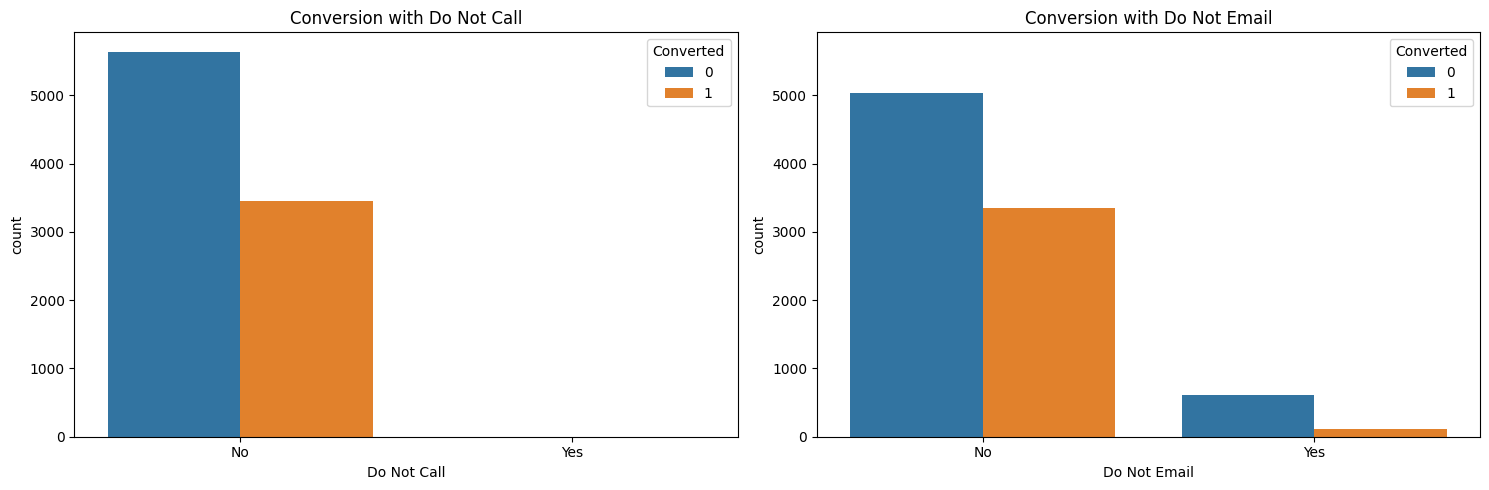

In [73]:
# Checking the variables Do Not Email & Do Not Call using a Subplots

# Set up the figure and axes for subplots
plt.figure(figsize=(15, 5))

# Create subplots
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=data, ax=ax1)
ax1.set_title("Conversion with Do Not Call")

ax2 = plt.subplot(1, 2, 2, sharey=ax1)  # Share y-axis to align counts
sns.countplot(x='Do Not Email', hue='Converted', data=data, ax=ax2)
ax2.set_title("Conversion with Do Not Email")

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


In [74]:
#Evaluating value counts for Do Not Call variable

data['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

Since Do Not Call has No as most occuring category it will create bias . So we can remove this from data

In [75]:
data.drop("Do Not Call", axis=1, inplace=True)

In [76]:
# Rechecking Data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                                   

In [77]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [78]:
# Ratio of the Do Not Email

data['Do Not Email'].value_counts(dropna=False, normalize = True)*100

Do Not Email
No    92.05
Yes    7.95
Name: proportion, dtype: float64

# Checking for categorical variables if they can be dropped

In [79]:
Check_cat_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [80]:
for i in Check_cat_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("-----------------------------------------------------------")

Search
Search
No     9089
Yes      14
Name: count, dtype: int64
-----------------------------------------------------------
Magazine
Magazine
No    9103
Name: count, dtype: int64
-----------------------------------------------------------
Newspaper Article
Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64
-----------------------------------------------------------
X Education Forums
X Education Forums
No     9102
Yes       1
Name: count, dtype: int64
-----------------------------------------------------------
Newspaper
Newspaper
No     9102
Yes       1
Name: count, dtype: int64
-----------------------------------------------------------
Digital Advertisement
Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64
-----------------------------------------------------------
Through Recommendations
Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64
-----------------------------------------------------------
Receive More Updates Abou

From the above we can understand that the variables listed under cols_to_drop can be dropped.

In [81]:
data.drop(Check_cat_var,axis=1, inplace=True)

In [82]:
#checking value counts of last Notable Activity
data ['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [83]:
#We can consolidate the categories that has less than 1% occurance on the Last Notable Activity

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

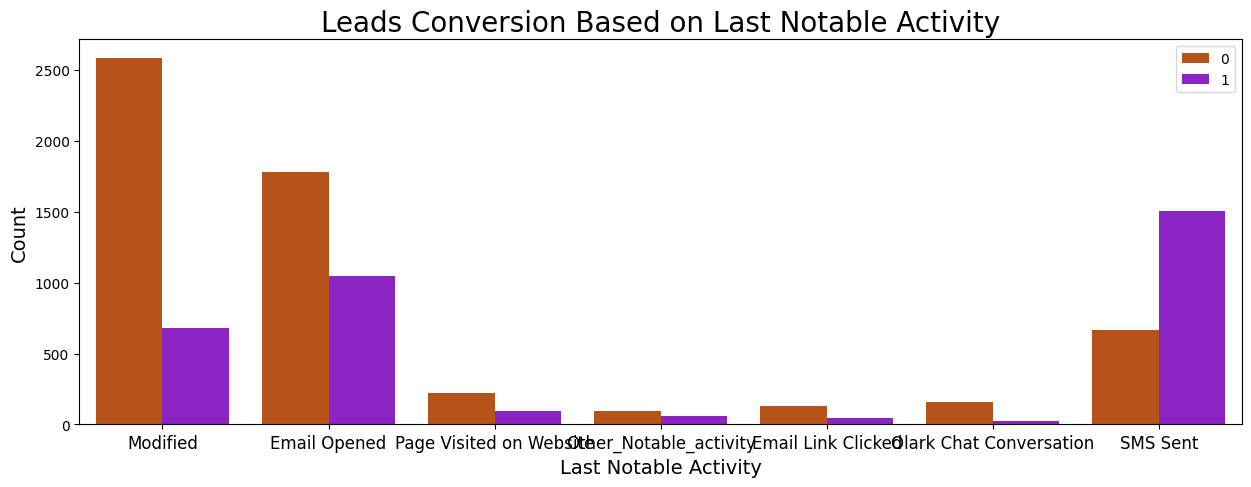

In [84]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15, 5))

# Visualizing using Countplot
count_fig = sns.countplot(x='Last Notable Activity', hue='Converted', data=data, palette='gnuplot_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=0, fontsize=12)

# Formatting the plot
plt.title("Leads Conversion Based on Last Notable Activity", fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(loc='upper right')  # Use 'upper right' for clarity
plt.show()


## Analysis:
    SMS Sent has more converion than any of the activity
    Seems Modified has the least conversion ratio
    Also, Other Notable Activity also has almost very signifiable reason for conversion

In [85]:
#Count of categories under Last Notable Activity

data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: count, dtype: int64

In [86]:
# Checking the ratio of the Notable Activity
data['Last Notable Activity'].value_counts(normalize = True)* 100

Last Notable Activity
Modified                  35.92
Email Opened              31.06
SMS Sent                  23.86
Page Visited on Website    3.49
Olark Chat Conversation    2.01
Email Link Clicked         1.90
Other_Notable_activity     1.76
Name: proportion, dtype: float64

In [87]:
#Checking the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

##  Analysis on Numerical Variables

**Converted Column**

In [88]:
data['Converted'].value_counts()

Converted
0    5642
1    3461
Name: count, dtype: int64

In [89]:
data['Converted'].value_counts(normalize=True)*100

Converted
0   61.98
1   38.02
Name: proportion, dtype: float64

From the above we can see that the conversion rate is 38%

### Analysing the numerical variables on Correlation using a heatmap

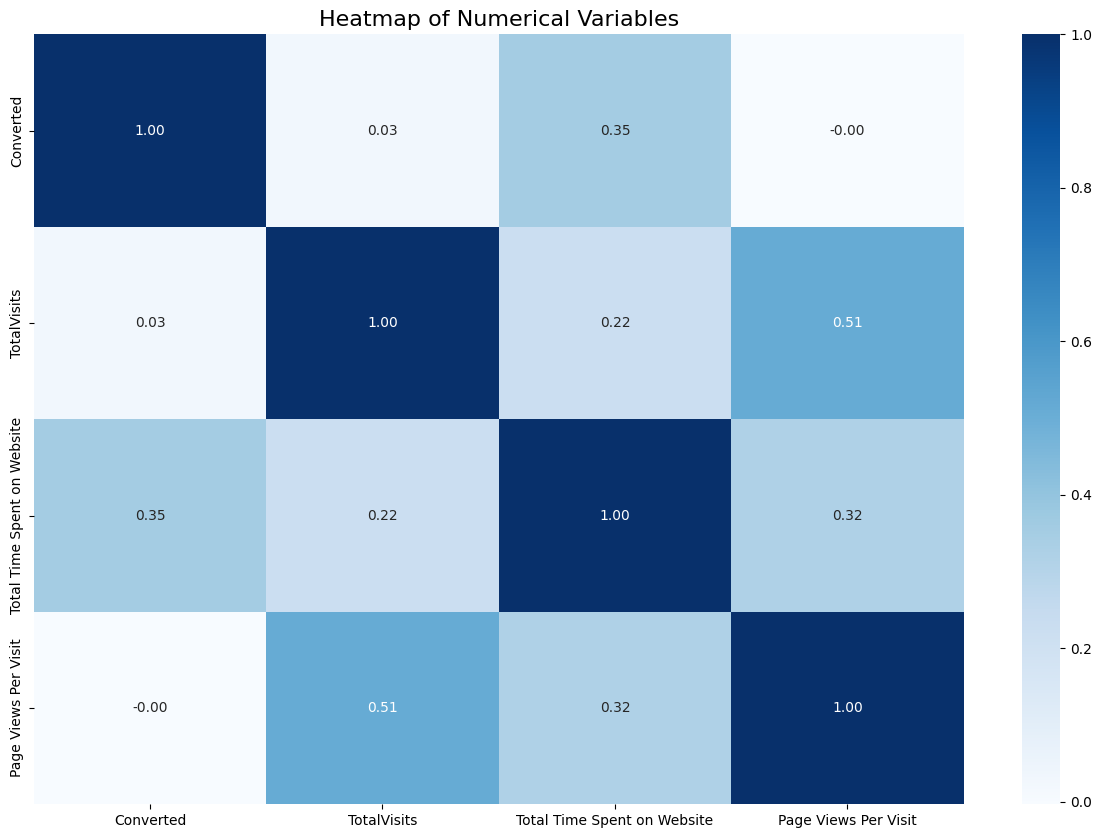

In [90]:
# Filter for numeric columns only
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Adjusted size for better clarity
sns.heatmap(corr_matrix, cmap="Blues", annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title("Heatmap of Numerical Variables", fontsize=16)
plt.show()


### Let us analyse the Numerical variables with Boxplots

In [91]:
# Analysing the Total Time Spent on Website variable
data['Total Time Spent on Website'].describe()

count   9103.00
mean     481.35
std      545.07
min        0.00
25%        9.00
50%      244.00
75%      919.50
max     2272.00
Name: Total Time Spent on Website, dtype: float64

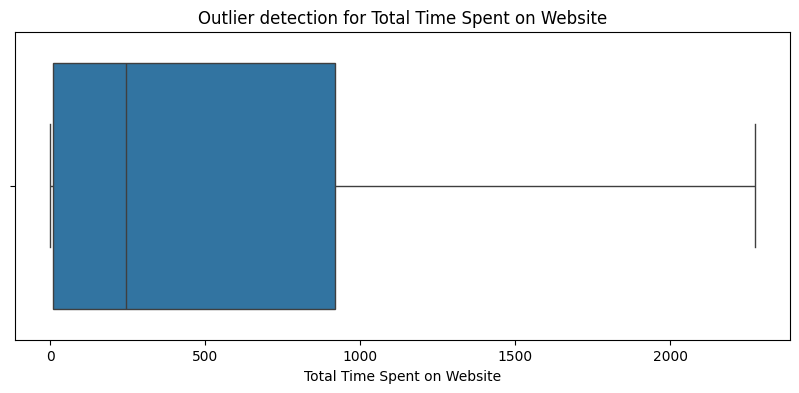

Median of "Total Time Spent on Website" is  244.0


In [92]:
#Outlier Detection of numeric variable using boxplot

plt.figure(figsize=(10,4))

sns.boxplot(x=data['Total Time Spent on Website'])

plt.title('Outlier detection for Total Time Spent on Website')
plt.show()

print ('Median of "Total Time Spent on Website" is ', data['Total Time Spent on Website'].median())

#### Also we can see that there are no Outlier for te Total Time Spent on the website, hence no action required for this variable

In [93]:
# Analysing the Total Time Spent on Website variable
data['TotalVisits'].describe()

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

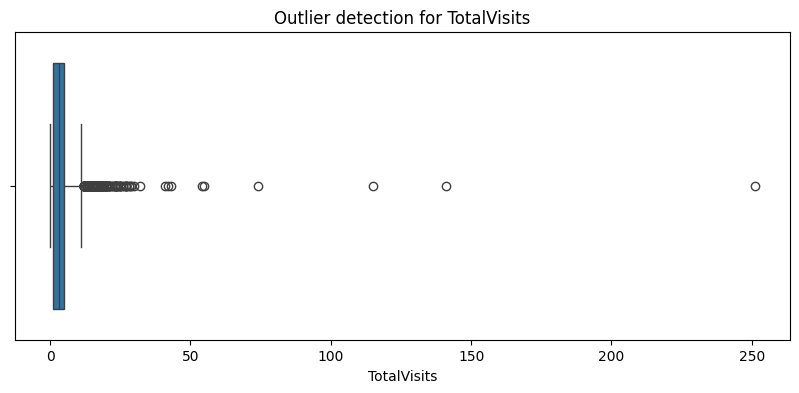

Median of TotalVisits is 3.0


In [94]:
#Setting the figure

plt.figure(figsize=(10,4))

sns.boxplot(x=data['TotalVisits'])

## Formatting the figure
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', data['TotalVisits'].median())


#### From the above we can see that there are Outliers present in the data

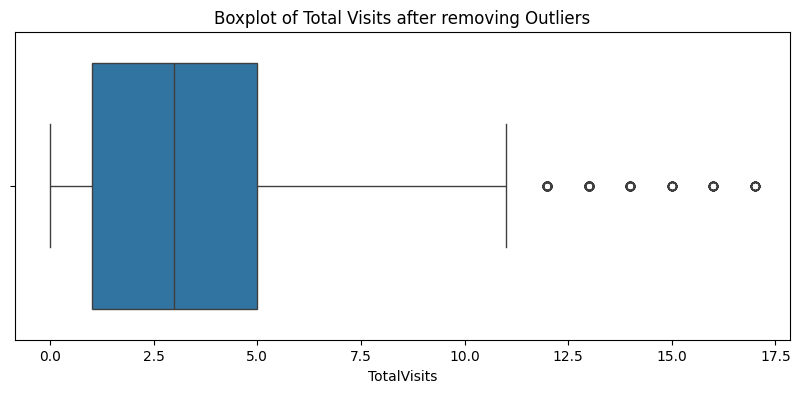

In [95]:
#Removing the Oultiers from the data

plt.figure(figsize=(10,4))

Q3 = data['TotalVisits'].quantile(0.99)

data = data[(data['TotalVisits'] <= Q3)]

Q1 = data['TotalVisits'].quantile(0.01)

data = data[(data['TotalVisits'] >= Q1)]

sns.boxplot(x=data['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [96]:
data.shape

(9020, 14)

In [97]:
#Analysing Page Views Per Visit

data['Page Views Per Visit'].describe()

count   9020.00
mean       2.34
std        2.06
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: Page Views Per Visit, dtype: float64

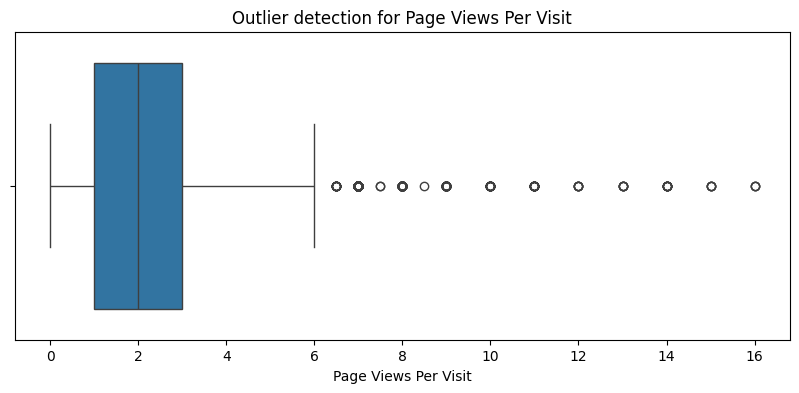

Median of Page Views Per Visit is 2.0


In [98]:
#Boxplot for  Page Views Per Visit

plt.figure(figsize=(10,4))

sns.boxplot(x=data['Page Views Per Visit'])

## Formatting the figure
plt.title('Outlier detection for Page Views Per Visit')
plt.show()

print ('Median of Page Views Per Visit is', data['Page Views Per Visit'].median())


### Since there are Outliers present in the data, we need to remove them. We will cap it at 1%

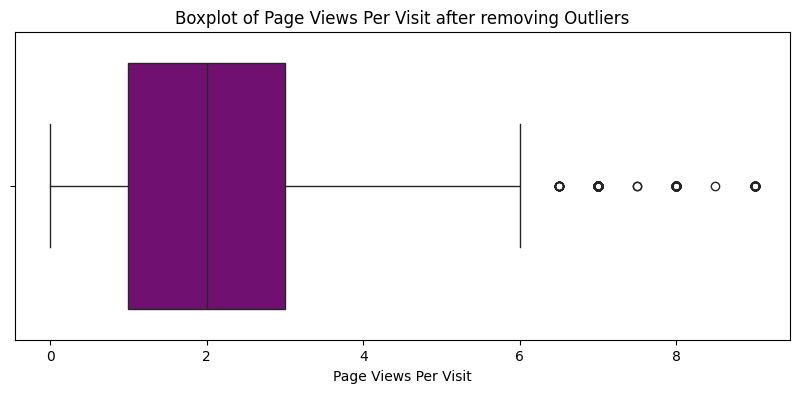

In [99]:

plt.figure(figsize=(10,4))

Q3 = data['Page Views Per Visit'].quantile(0.99)

data = data[(data['Page Views Per Visit'] <= Q3)]

Q1 = data['Page Views Per Visit'].quantile(0.01)

data = data[(data['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=data['Page Views Per Visit'],color = "purple")
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()

In [100]:
#Checking on the shape of the dataset 
data.shape

(8953, 14)

In [101]:
# Checking the total null values inside the data
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We can confirm there are no NA values present in the data

## Model Preparation

### Step 1 - Creating Dummy variables

In [102]:
#First we need to get a list of categorical columns present in the data

categorical_vals= data.select_dtypes(include=['object']).columns
categorical_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Printing Categorical variables to know if mapping is required

In [103]:
for i in categorical_vals:
    print(i)
    print(data[i].value_counts())
    print(" ")

Lead Origin
Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: count, dtype: int64
 
Lead Source
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: count, dtype: int64
 
Do Not Email
Do Not Email
No     8256
Yes     697
Name: count, dtype: int64
 
Last Activity
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: count, dtype: int64
 
Specialization
Specialization
Management_Specializations           4126
Not Sp

In [104]:
# We can see that 'A free copy of Mastering The Interview','Do Not Email' has yes and no's which can 
#converted to1's and 0's

map_var =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
data[map_var] = data[map_var].apply(binary_map)

In [105]:
# Checking if the mapping has gone through

data[map_var].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


#### Adding Dummy Variables to the data  for 'Lead Origin','What is your current occupation' and 'City'

In [106]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],axis=1)

#### Adding Dummy Variables to the data  for Specialization

In [107]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis=1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Lead Source

In [108]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Last Activity

In [109]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Last Notable Activity

In [110]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis=1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Tags

In [111]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis=1)
data = pd.concat([data, dummy], axis = 1)

#### Since we have created dummy variables for all the categorical variables, we can remove the original columns from the data

In [112]:
#dropping the original columns after dummy variable creation

data.drop(categorical_vals,axis=1,inplace = True)

In [113]:
#Checking the data to see if the applied EDA is clear
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.00,0,0.00,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1,0,5.00,674,2.50,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,1,2.00,1532,2.00,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0,1.00,305,1.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,1,2.00,1428,1.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [114]:
# Checking if we have any categorical variable present in the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   bool   
 5   Lead Origin_Lead Add Form                             8953 non-null   bool   
 6   Lead Origin_Lead Import                               8953 non-null   bool   
 7   What is your current occupation_Housewife             8953 non-null   bool   
 8   What is your current occupation_Other                 8953 non-

### Since there are no variables present, we can go ahead in creating the model

### Model Building: Logistic Regression

#### Splitting the data into Training and Testing Set - For this we need to import Train Test Split from SKLearn

In [115]:
from sklearn.model_selection import train_test_split

y = data['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [116]:
# Independent Variables
X=data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.00,0,0.00,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1,5.00,674,2.50,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,2.00,1532,2.00,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,1.00,305,1.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,2.00,1428,1.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [117]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [118]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.00,1490,5.00,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4696,3.00,457,3.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
3274,4.00,126,2.00,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
2164,2.00,393,2.00,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1667,4.00,1167,1.33,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [119]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.00,311,2.50,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
984,3.00,183,3.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
8135,2.00,913,2.00,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
6915,4.00,141,2.00,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2712,3.00,252,3.00,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [120]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [121]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   bool   
 4   Lead Origin_Lead Add Form                             6267 non-null   bool   
 5   Lead Origin_Lead Import                               6267 non-null   bool   
 6   What is your current occupation_Housewife             6267 non-null   bool   
 7   What is your current occupation_Other                 6267 non-null   bool   
 8   What is your current occupation_Student               6267 n

In [123]:
X_train.shape

(6267, 56)

In [124]:
y_train.shape

(6267,)

In [125]:
X_test.shape

(2686, 56)

In [126]:
y_test.shape

(2686,)

### Scaling of Data using Standard Scaler from SciKit Learn

In [127]:
#Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical cols for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.67,1.85,1.46,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4696,-0.03,-0.04,0.40,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
3274,0.32,-0.64,-0.13,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
2164,-0.38,-0.15,-0.13,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1667,0.32,1.26,-0.48,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


###  Building Logistic Regression using Stats Model & RFE:

In [128]:
# Importing Statsmodels
import statsmodels.api as sm

In [129]:


# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Ensure convergence

# Initialize RFE with logistic regression and specify the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Print the results
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False  True False  True False
 False False False False False False  True  True False  True  True False
 False False  True  True  True  True  True  True]
Feature Ranking: [23  1 22 10  1 26 32 33 16 15  8 21 37 40 38 28 14 39 34 20 41 35 30 29
 31  5  1  3 42 24  2 13  1 25  1 11  6 36 18 17  7 12  1  1 19  1  1 27
  4  9  1  1  1  1  1  1]


In [130]:
#printing the Output 
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True])

In [131]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('What is your current occupation_Housewife', False, 32),
 ('What is your current occupation_Other', False, 33),
 ('What is your current occupation_Student', False, 16),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 21),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 34),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_International Business', F

In [132]:
# checking the rfe Supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [133]:
X_train_rfe = X_train[col]

In [134]:
X_train_sm = sm.add_constant(X_train[col])
log_model = sm.GLM(y_train, X_train_sm.astype(float), family=sm.families.Binomial())
res = log_model.fit()

# Print the model summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.9
Date:                Thu, 22 Aug 2024   Deviance:                       2517.8
Time:                        20:16:51   Pearson chi2:                 8.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6042
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### From here we can start building models for further analysis

When evaluating the RFE , we should remove the variable that has highest P-value.
So in this table, we can see that Source_Referral Sites has the highest P-value and that should be dropped for further analysis

In [135]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [136]:
#Model 2 after removing the Lead Source Referral Sites

X_train_sm = sm.add_constant(X_train[col])
log_model2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.6
Date:                Thu, 22 Aug 2024   Deviance:                       2519.1
Time:                        20:16:51   Pearson chi2:                 8.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6041
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0806      0.084    -12.794      0.000      -1.246      -0.915
Total Time Spent on Website                       0.8824      0.053     16.742      0.000       0.779       0.986
Lead Origin_Lead Add Form                         1.6478      0.455      3.625      0.000       0.757       2.539
Lead Source_Direct Traffic                       -0.8210      0.127     -6.475      0.000      -1.069      -0.572
Lead Source_Welingak Website                      3.9296      1.115      3.523      0.000       1.743       6.116
Last Activity_SMS Sent                            1.9685      0.113     17.399      0.000       1.747       2.190
Last Notable Activity_Email Link Clicked         -1.2813      0.511     -2.509      0.012      -2.282      -0.280
Last Notable Activity_Modified                   -1.6798      0.125    -13.460      0.000      -1.924      -1.435
Last Notable Activity_Olark Chat Conversation    -1.8378      0.491     -3.740      0.000      -2.801      -0.875
Tags_Closed by Horizzon                           7.2141      1.020      7.072      0.000       5.215       9.214
Tags_Interested in other courses                 -2.1364      0.406     -5.267      0.000      -2.931      -1.341
Tags_Lost to EINS                                 5.9481      0.610      9.744      0.000       4.752       7.144
Tags_Other_Tags                                  -2.3678      0.206    -11.472      0.000      -2.772      -1.963
Tags_Ringing                                     -3.4579      0.237    -14.566      0.000      -3.923      -2.993
Tags_Will revert after reading the email          4.5154      0.188     23.984      0.000       4.146       4.884
=================================================================================================================
"""

Now we can see that all the variables have their the p-values equal to 0. So we can check for the VIF Variance Inflation Factor for checking if there are any correlation between the variables

 #### VIF Variance Inflation Factor for checking correlation between variables

In [137]:
#Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
df1 = X_train[col].astype(float)

vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
13,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
6,Last Notable Activity_Modified,1.41
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.23
8,Tags_Closed by Horizzon,1.22
12,Tags_Ringing,1.16


We can see that there is a high correlation between two variables **"Last Notable Activity_SMS Sent"** and **Last Activity_SMS Sent**,  so we need drop the variables one by one based on their values

In [139]:
#Removing variable with high VIF Value

col = col.drop('Lead Origin_Lead Add Form',1)

In [140]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[col])
log_model3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.9
Date:                Thu, 22 Aug 2024   Deviance:                       2533.8
Time:                        20:16:51   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6032
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0620      0.084    -12.657      0.000      -1.226      -0.898
Total Time Spent on Website                       0.8606      0.053     16.393      0.000       0.758       0.964
Lead Source_Direct Traffic                       -0.8662      0.127     -6.815      0.000      -1.115      -0.617
Lead Source_Welingak Website                      5.5435      1.023      5.419      0.000       3.538       7.548
Last Activity_SMS Sent                            1.9953      0.113     17.729      0.000       1.775       2.216
Last Notable Activity_Email Link Clicked         -1.2988      0.508     -2.558      0.011      -2.294      -0.304
Last Notable Activity_Modified                   -1.7117      0.125    -13.713      0.000      -1.956      -1.467
Last Notable Activity_Olark Chat Conversation    -1.8591      0.494     -3.762      0.000      -2.828      -0.891
Tags_Closed by Horizzon                           7.8569      1.013      7.759      0.000       5.872       9.842
Tags_Interested in other courses                 -2.1162      0.406     -5.209      0.000      -2.912      -1.320
Tags_Lost to EINS                                 6.0376      0.609      9.914      0.000       4.844       7.231
Tags_Other_Tags                                  -2.3450      0.206    -11.388      0.000      -2.749      -1.941
Tags_Ringing                                     -3.4077      0.236    -14.444      0.000      -3.870      -2.945
Tags_Will revert after reading the email          4.6713      0.185     25.287      0.000       4.309       5.033
=================================================================================================================
"""

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
df2 = X_train[col].astype(float)
vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_SMS Sent,1.44
5,Last Notable Activity_Modified,1.40
12,Tags_Will revert after reading the email,1.37
1,Lead Source_Direct Traffic,1.36
10,Tags_Other_Tags,1.25
11,Tags_Ringing,1.16
0,Total Time Spent on Website,1.12
8,Tags_Interested in other courses,1.12
7,Tags_Closed by Horizzon,1.06
9,Tags_Lost to EINS,1.06


Since all the values are below 5, we can go ahead to interpret Probabilities, Lead Score and  Predictions on Train Data

In [142]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

9196   0.29
4696   0.03
3274   0.59
2164   0.01
1667   0.99
7024   0.14
8018   0.02
778    0.21
6942   0.00
4440   0.10
dtype: float64

In [143]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29238619, 0.03314599, 0.5940371 , 0.0065413 , 0.99091805,
       0.14032333, 0.02480227, 0.20769248, 0.00281692, 0.09852885])

In [144]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.29,9196
1,0,0.03,4696
2,0,0.59,3274
3,0,0.01,2164
4,1,0.99,1667


In [145]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.29,9196,0
1,0,0.03,4696,0
2,0,0.59,3274,1
3,0,0.01,2164,0
4,1,0.99,1667,1


In [146]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3693  189]
 [ 279 2106]]


In [147]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9253231211105792


In [148]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [149]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)


True positive is  2106
True negatives is  3693
False positives is  189
False negatives is  279


### Here we can see that we have got a very good predition with the model

### Now we need to Check on the sensitivity and Specificity

In [150]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  88.3 %


In [151]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  95.13 %


In [152]:
# Calculate False Postive Rate
#In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.

print(FP/ float(TN+FP))

0.04868624420401855


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.9176470588235294


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9297583081570997


#### From the above Analysis, it clear that we have a very good predictive model

### PLOTTING ROC CURVE

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

<Figure size 1500x1500 with 0 Axes>

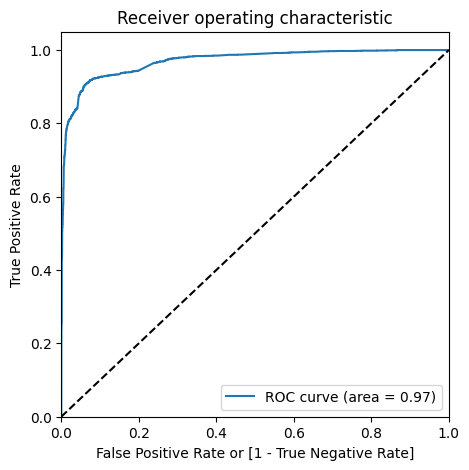

In [157]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

 #### A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.
#### Generally, the ROC Curve should be a value close to 1 to be a good model.
#### Here we are getting a good value of 0.97 indicating a good predictive model.

###  Optimal Cutoff Point

In [158]:
#We need to create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head() # Head of the newly created columns

,Converted,Converted_prob,Prospect ID,Predicted,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
0,1,0.29,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.59,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.82   0.97   0.73
0.20  0.20      0.90   0.93   0.88
0.30  0.30      0.92   0.92   0.93
0.40  0.40      0.93   0.90   0.94
0.50  0.50      0.93   0.88   0.95
0.60  0.60      0.92   0.83   0.97
0.70  0.70      0.91   0.81   0.98
0.80  0.80      0.91   0.78   0.99
0.90  0.90      0.89   0.72   0.99


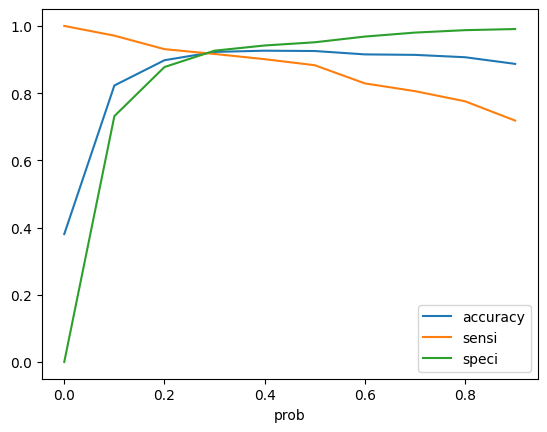

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:
# From the curve above,We can finalise that 0.3 is the optimum cut off point

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,final_Predicted
0,1,0.29,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.59,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.29,9196,0,29
1,0,0.03,4696,0,3
2,0,0.59,3274,1,59
3,0,0.01,2164,0,1
4,1,0.99,1667,1,99


In [163]:
# Checking the Accuracy.

accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
accuracy = round(accuracy*100,2)
print ('Accuracy is ',accuracy)

Accuracy is  92.26


In [164]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3596,  286],
       [ 199, 2186]], dtype=int64)

In [165]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]


print("True positive is ",TP ) 
print('True negative is ',TN )
print('False positive is ',FP )
print('False negative is ',FN)

True positive is  2186
True negative is  3596
False positive is  286
False negative is  199


In [166]:
# Checking sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN)*100,2)
sensitivity

91.66

In [167]:
# Checking specificity of our Logistic Regression Model
specificity = round(TN / float(TN+FP)*100,2)
specificity

92.63

### Analysis:
Based on the scores that we have got, we can conlcude that our model performed very well.
- The ROC curve has a value of 0.97
- Accuracy reached a total of 92.29%
- Sensitivity at 91.70%
- Specificity at 92.66%

Further to the above, we can also calculate the below metrics
 - False Positive Rate
 - Positive Predictive Value
 - Negative Predictive Values
 - Precision & Recall. 

### False Positive Rate

In [168]:
FPR = (FP/ float(TN+FP)*100)
print(round(FPR,2))

7.37


### Positive predictive

In [169]:
print ('Positive predictive value is ',round(TP / float(TP+FP)*100,2))

Positive predictive value is  88.43


### Negative predictive value

In [170]:
print ('Negative predictive value is ',round(TN / float(TN+ FN)*100,2))

Negative predictive value is  94.76


### Confusion matrix


In [171]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3596,  286],
       [ 199, 2186]], dtype=int64)

### Calculating Precision and Recall

In [172]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8843042071197411

In [173]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9165618448637316

In [174]:
# Importing Precision and Recall from SKlearn

from sklearn.metrics import precision_score, recall_score

In [175]:
precision  = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
print('Precision is ',round(precision*100,2))

Precision is  88.43


In [176]:
Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
print('Recall is ',round(Recall*100,2))

Recall is  91.66


### Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [177]:
#Importing Precision Recall curve
from sklearn.metrics import precision_recall_curve

In [178]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

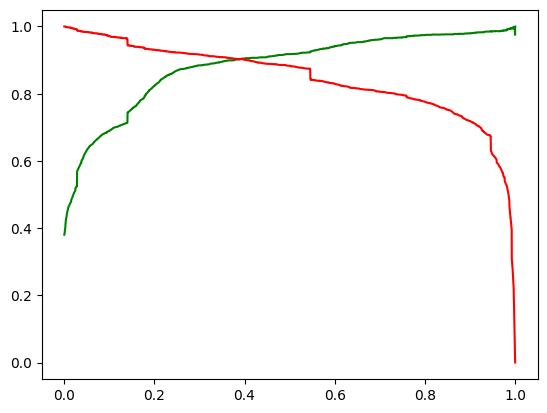

In [179]:
# Plotting the Precision Recall Curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Since our Model is performing well on the training set, we can start predicting on the test set

In [180]:
# Scaling test set with the same Scaler that we scaled the training set

numerical_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

# Transforming the test set

X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.58,-0.31,0.09,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
984,-0.09,-0.55,0.36,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
8135,-0.42,0.81,-0.17,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
6915,0.24,-0.63,-0.17,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2712,-0.09,-0.42,0.36,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


In [181]:
# Selecting the columns that were identified by RFE in the training set

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.31,True,False,True,False,False,False,False,False,False,False,True,False
984,-0.55,False,False,True,False,True,False,False,False,False,True,False,False
8135,0.81,True,False,True,False,False,False,False,False,False,False,False,False
6915,-0.63,False,False,False,False,False,False,False,False,False,False,True,False
2712,-0.42,False,False,False,False,False,False,False,False,False,False,False,True


#### Adding constant to the Test set

In [182]:
X_test_sm = sm.add_constant(X_test)

### Predictions on the test set

In [183]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [184]:
# Checking if we have got the output

y_test_pred[:10]

7681   0.03
984    0.03
8135   0.68
6915   0.01
2712   0.96
244    0.00
4698   0.02
8287   0.03
6791   0.98
8970   0.01
dtype: float64

In [185]:
# Now we can convert y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [186]:
# Checking the head
y_pred_1.head()

,0
7681,0.03
984,0.03
8135,0.68
6915,0.01
2712,0.96


In [187]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [188]:
# Resetting index to Prospect ID
y_test_df['Prospect ID'] = y_test_df.index

In [189]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Concatenating  the test dataframe and training dataframe for comparison
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

### Final Prediction Figure

In [191]:
# Checking the final dataframe
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.03
1,0,984,0.03
2,0,8135,0.68
3,0,6915,0.01
4,1,2712,0.96


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob_Conv'})

In [193]:
y_pred_final.head()

,Converted,Prospect ID,Prob_Conv
0,0,7681,0.03
1,0,984,0.03
2,0,8135,0.68
3,0,6915,0.01
4,1,2712,0.96


In [194]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Prob_Conv']]
y_pred_final['Lead_Score'] = y_pred_final['Prob_Conv'].map( lambda x: round(x*100))

In [195]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Prob_Conv,Lead_Score
0,7681,0,0.03,3
1,984,0,0.03,3
2,8135,0,0.68,68
3,6915,0,0.01,1
4,2712,1,0.96,96


In [196]:
y_pred_final['final_Score_predicted'] = y_pred_final['Prob_Conv'].map(lambda x: 1 if x > 0.3 else 0)

In [197]:
y_pred_final.head()

,Prospect ID,Converted,Prob_Conv,Lead_Score,final_Score_predicted
0,7681,0,0.03,3,0
1,984,0,0.03,3,0
2,8135,0,0.68,68,1
3,6915,0,0.01,1,0
4,2712,1,0.96,96,1


#### Since we have got the model, we can evaluate the Accuracy, Precision, Recall

In [198]:
Accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_Score_predicted'])
Accuracy = round(Accuracy*100,2)
print("Accuracy is ",Accuracy)

Accuracy is  92.63


In [199]:
#Analysing the Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_Score_predicted'] )
confusion_matrix

array([[1564,  112],
       [  86,  924]], dtype=int64)

In [200]:
TP = confusion_matrix[1,1] #  
TN = confusion_matrix[0,0] # 
FP = confusion_matrix[0,1] # 
FN = confusion_matrix[1,0] # 

#### True positive

In [201]:
print('True positive is ',TP)

True positive is  924


#### True negative

In [202]:
print('True negatives is ',TN)

True negatives is  1564


#### False positive

In [203]:
print('False positive is ',FP)

False positive is  112


#### False negative

In [204]:
print('False Negatives is ',FN)

False Negatives is  86


#### Sensitivity

In [205]:

sensitivity = TP / float(TP+FN)
print('Sensitivity is ',round(sensitivity*100,2))

Sensitivity is  91.49


#### Specificity

In [206]:
# Let us calculate 
Specificity = TN / float(TN+FP)
print('Specificity is ',round(Specificity*100,2))

Specificity is  93.32


#### Precision

In [207]:
Precision = precision_score(y_pred_final['Converted'] , y_pred_final['final_Score_predicted'])
Precision = round (Precision*100,2)
print('Precision is ',Precision)

Precision is  89.19


#### Recall

In [208]:
Recall = recall_score(y_pred_final['Converted'] , y_pred_final['final_Score_predicted'])
Recall = round(Recall*100,2)
print('Recall is ',Recall)

Recall is  91.49


### Detailed Analysis:

Our model ran vrey well with the Training Set. Initially we had to removed the variables, which did not add value to our analysis
Atlast we ended up with variables :

- **Last Activity**: SMS Sent
- **Last Notable Activity**: Modified
- **Tags**:
  - Will revert after reading the email
  - Other Tags
  - Ringing
  - Interested in other courses
  - Closed by Horizzon
  - Lost to EINS
- **Lead Source**: Direct Traffic
- **Total Time Spent on Website**
- **Lead Source**: Welingak Website
- **Last Notable Activity**:
  - Email Link Clicked
  - Olark Chat Conversation


  
	

Initially our model performed very well with the following metrics on training data
 - Accuracy : 92.29%
 - Sensitivity : 91.70%
 - Specificity : 92.66%
 
 Ultimately our Test data passed with the below metrics which are pretty good
 
- Accuracy : 92.63%
- Sensitivity : 91.49%
- Specificity : 93.32%

### Recommendations

 - It is quite interesting to see that most of the responses we recived are from India and specifically from Mumbai.
    There could be potential customers if we focus on other market
 - Also Since more are inclined to Mumbai, it would be good to provide Offers or Discounts which could increase the sale
 - People from Management tends to search for more courses. Targeting on corporates could increase the conversion rate
 - Trageting on working professionals can bring more conversion rate. Also there is a 50% chance for conversion from 
    unemployed people. We can infer that people are looking forward to upskill once they have the opportunity
 - Most of the leads generated are through Google and Direct traffic and the least through Live Chat
 - Welingak website ahs the most conversion rate
 - Lead conversion can be improved by maxising leads from Reference and welingak website
 - Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion
 - There is a high correlation between two variables Last Notable Activity_SMS Sent and Last Activity_SMS Sent
 - The Median of Time Spent on Website is  244 mins
 - API and Landing Page Submission bring more number of leads as well as conversion.
 - Lead Add Form has a very high conversion rate but count of leads are not very high.
 - If Lead add form could get more leads, then the rate of conversion can be very high and for overall growth